In [14]:
import pandas as pd
import numpy as np
import random as rd
import sklearn as skl
import matplotlib.pyplot as plt


In [1]:
pip install pygame

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.3/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.6 MB 2.3 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/10.6 MB 2.5 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/10.6 MB 2.7 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/10.6 MB 3.2 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/10.6 MB 3.4 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/10.6 MB 3.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.5/10.6 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 7.1/10.6 MB 3.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 4.1 MB/s eta 0:00:01
   ------------------------------------- -- 10.0/10.6 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 4.5 MB/s  0:00:02
Note: you may 

In [15]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt'+ str(i) for i in range(1, 6)] #"wild type" / "knockout" samples
ko = ['ko'+ str(i) for i in range(1, 6)]

data = pd.DataFrame(columns = [*wt, *ko], index = genes)

for gene in data.index:
    data.loc[gene, wt] = np.random.poisson(lam = rd.randrange(10, 10000), size = 5)
    data.loc[gene, ko] = np.random.poisson(lam = rd.randrange(10, 10000), size = 5)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,3799,3932,3934,3944,3964,9780,9952,9939,10028,9839
gene2,8331,8360,8489,8405,8274,2341,2223,2245,2247,2190
gene3,5631,5390,5548,5405,5553,2640,2552,2729,2783,2656
gene4,621,637,618,608,605,8138,8001,8194,8320,8225
gene5,8124,8158,8234,8243,8050,9797,9560,9688,9625,9597
...,...,...,...,...,...,...,...,...,...,...
gene96,5219,5343,5292,5472,5363,9640,9647,9739,9530,9404
gene97,7452,7601,7532,7751,7626,9838,9924,10021,9708,9849
gene98,847,866,901,901,915,4409,4242,4335,4331,4245
gene99,8028,8004,8122,8269,7915,2979,2906,2951,2849,2893


In [16]:
scaled_data = skl.preprocessing.scale(data.T)
scaled_data

array([[-1.03825585,  0.98646789,  1.08664175, -0.99895675, -1.04503649,
         0.85231378,  0.89301602, -0.99143344,  1.01751825,  0.61706252,
        -0.99316636, -1.02845973, -1.05345664,  1.35081365,  1.0515476 ,
         0.79265473, -0.98617195, -0.3571837 ,  0.86177571, -1.0313734 ,
        -0.97838848,  1.04877381,  0.96866871, -1.06870879,  0.99241725,
         0.94347417,  0.96625467, -1.02110987, -0.99509749,  0.98506056,
        -1.01062773, -1.00518933,  0.99772901,  0.95756172,  1.0020158 ,
         1.00140272,  0.95744395,  1.23836545, -1.04420017, -0.98868585,
         1.0329711 , -0.97014685, -1.3478953 , -1.00726484, -1.00301925,
        -1.00026646,  1.04892823, -0.97592971,  1.07169935,  1.02281807,
        -0.94768751, -1.01174954, -0.58224972,  0.4468788 , -0.90186144,
         1.01502307, -0.74828794,  1.17610828,  0.83334922,  1.00739865,
        -1.02130982, -0.998539  , -0.95355121, -1.01162929, -1.70192308,
        -1.21028745, -1.0010062 ,  1.00437137,  0.9

In [25]:
pca = skl.decomposition.PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

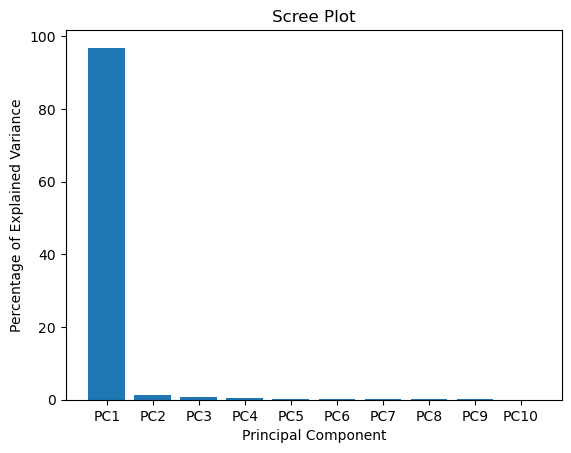

In [28]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [31]:
pca_df = pd.DataFrame(data = pca_data, columns = labels, index = [*wt, *ko])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.739503,-1.934769,0.617594,-0.041748,-0.061425,0.332200,-0.759990,-0.115168,-0.044395,-1.300677e-15
wt2,-9.922025,-1.087785,0.551905,-0.385241,-0.081849,-0.752530,0.619407,-0.068192,0.253711,3.091461e-16
wt3,-9.916570,0.408964,-1.410797,-1.072578,-0.327102,0.535001,0.222801,0.297258,-0.039976,-2.299878e-15
wt4,-9.722671,1.698993,1.047207,-0.042637,0.900675,0.229859,0.099894,-0.227499,-0.149949,3.159037e-17
wt5,-9.880133,0.929573,-0.794707,1.531134,-0.424872,-0.348653,-0.196294,0.107787,-0.022135,-5.797081e-15
ko1,9.961362,1.255896,0.765055,-0.702657,-0.293527,-0.342403,-0.523461,0.427900,0.257274,6.422130e-16
ko2,9.696073,-0.690356,0.900128,0.579888,-0.189824,0.322037,0.469400,0.556170,-0.345523,2.696126e-15
ko3,9.951287,-0.241373,-0.859122,-0.475961,0.194010,-0.568956,-0.148573,-0.350010,-0.523838,-1.904542e-16
ko4,9.810296,0.367876,0.192718,0.173972,-0.673778,0.440510,0.208304,-0.757613,0.212475,1.197325e-15
ko5,9.761883,-0.707020,-1.009980,0.435826,0.957693,0.152936,0.008512,0.129366,0.402355,1.363858e-15


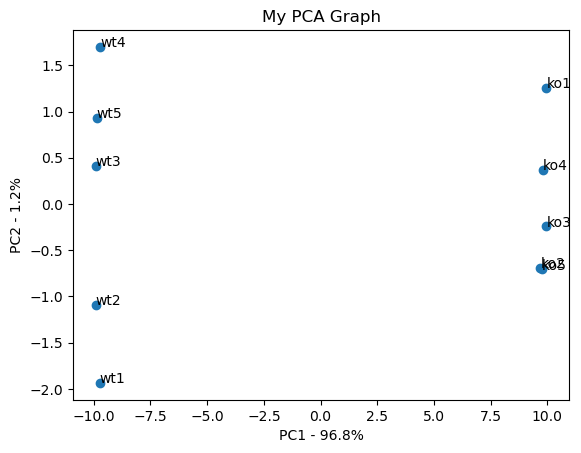

In [34]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [43]:
loading_scores = pd.Series(pca.components_[0], index = data.index)
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene78    0.101657
gene25   -0.101655
gene62    0.101653
gene64    0.101649
gene84    0.101649
gene11    0.101645
gene27   -0.101643
gene37   -0.101641
gene4     0.101639
gene50   -0.101639
dtype: float64
